# Gradient Boosting Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
y = df["Salary"]
X = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
model = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.68403357543554

## Parametreler
* **criterion = "friedman_mse":** Bölünmelerle ilgili saflık ölçüsünü ifade etmektedir.
* **learning_rate = 0.1:** Ağaçların katkısı ile ilgili göz önünde bulundurulan bir değerdir.
* **loss = "ls":** Kayıp fonksiyonudur. **ls** en küçük kareleri ifade etmektedir.
* **max_depth:** Ağacın derinliğidir.
* **max_features:** Göz önünde bulundurulacak değişken sayısıdır.
* **n_estimators:** Kullanılacak olan ağaç sayısını ifade etmektedir.
* **subsample = 1.0:** Oluşturulacak olan ağaçları oluştururken göz önünde bulundurulacak olan oranı ifade etmektedir. **(1.0 = hepsi dahil demek)**

In [6]:
params = {
    "learning_rate": [0.001,0.01,0.1,0.5],
    "max_depth": [3,5,8,10],
    "n_estimators": [100,200,500,1000],
    "subsample": [1,0.5,0.8],
    "loss": ["ls","lad","hiber","quantile"],
}
gbm = GradientBoostingRegressor()
model_cv = GridSearchCV(gbm, params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 768 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2034 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2561 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3768 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4457 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5742 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 6593 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed: 12.7min finished


In [8]:
model_cv.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [9]:
model_tuned = GradientBoostingRegressor(learning_rate=0.01,
                                        loss="lad",
                                        max_depth=3,
                                        n_estimators=100,
                                        subsample=0.5).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

383.3341153342835

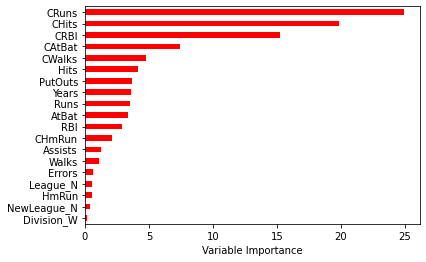

In [10]:
Importance = pd.DataFrame({"Importance": model_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None